## Lecture 7 – Data 100, Spring 2023

by Josh Hug and Narges Norouzi

Adapted from material by Ani Adhikari, Suraj Rampure, and Fernando Pérez.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
births = pd.read_csv('data/baby.csv')

In [3]:
births.head()

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           120               284            27               62   
1           113               282            33               64   
2           128               279            28               64   
3           108               282            23               67   
4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False

In [4]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [5]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

This would have been the Data 8 code to do something similar:
```python

from datascience import Table
t = Table.from_df(births['Maternal Smoker'].value_counts().reset_index())
t.barh("index", "Maternal Smoker")
```

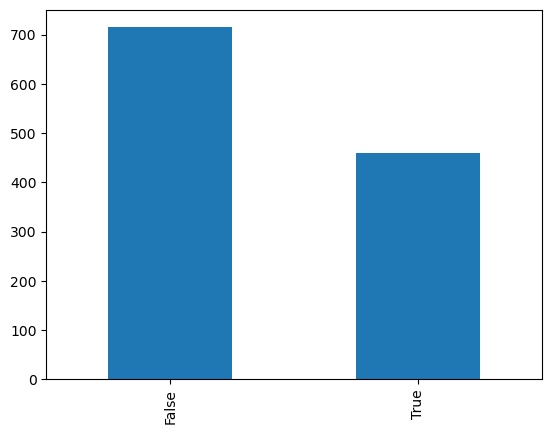

In [6]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

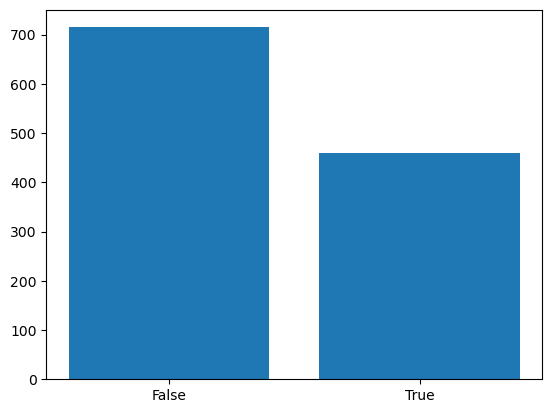

In [7]:
ms = births['Maternal Smoker'].value_counts();
plt.bar(ms.index.astype('string'), ms);

Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the `<matplotlib.axes_....>`).

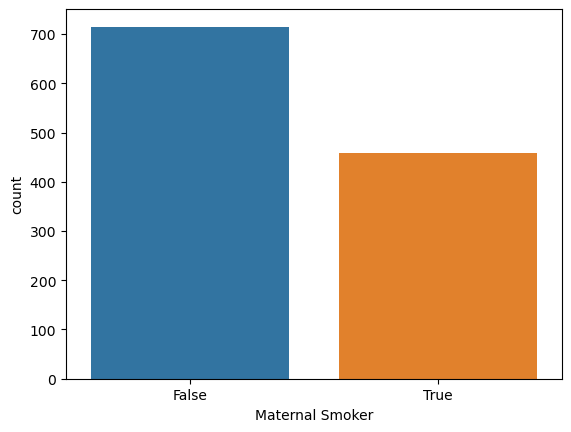

In [8]:
sns.countplot(data = births, x = 'Maternal Smoker');

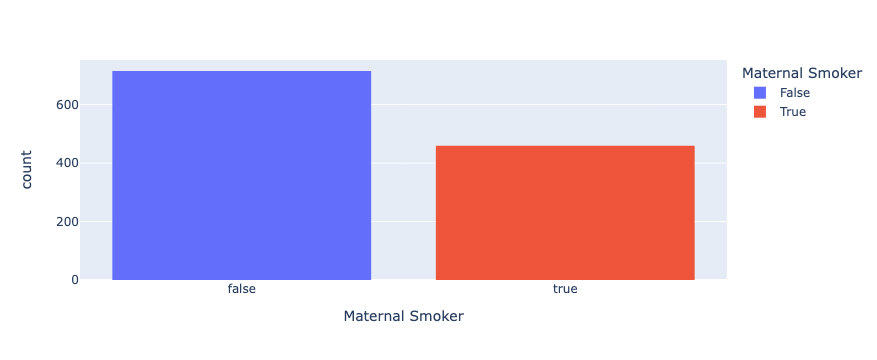

In [9]:
import plotly.express as px
px.histogram(births, x = 'Maternal Smoker', color = 'Maternal Smoker')

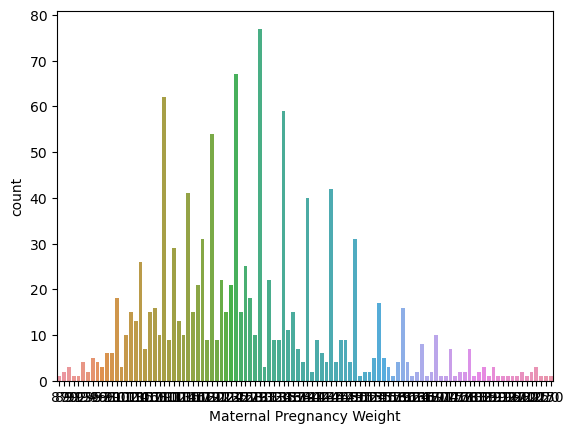

In [10]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

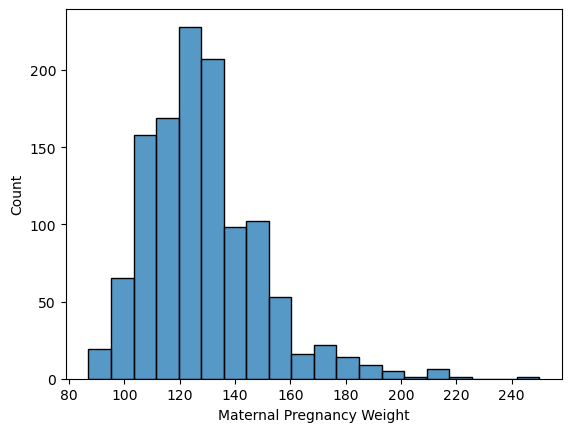

In [11]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);

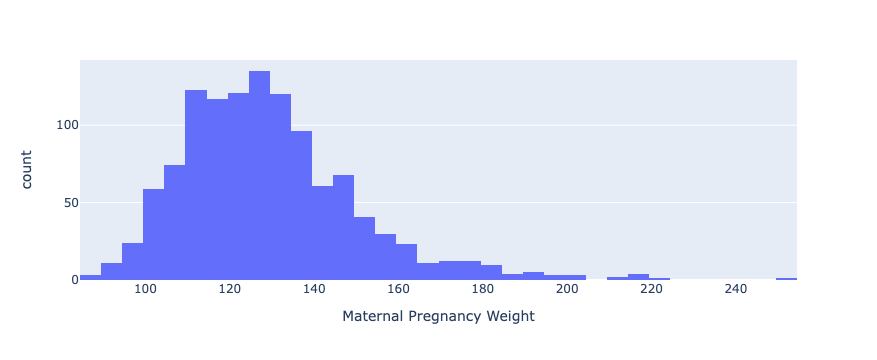

In [12]:
px.histogram(births, x = 'Maternal Pregnancy Weight')

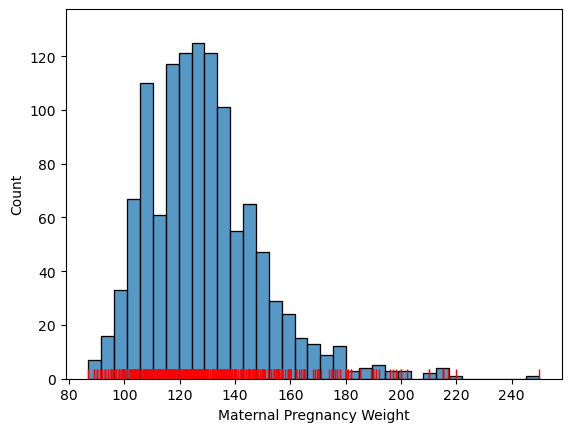

In [13]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = 'red');

In [14]:
median = births['Maternal Pregnancy Weight'].median()
mean = births['Maternal Pregnancy Weight'].mean()

print("Median", median)
print("Mean", mean)

Median 125.0
Mean 128.4787052810903


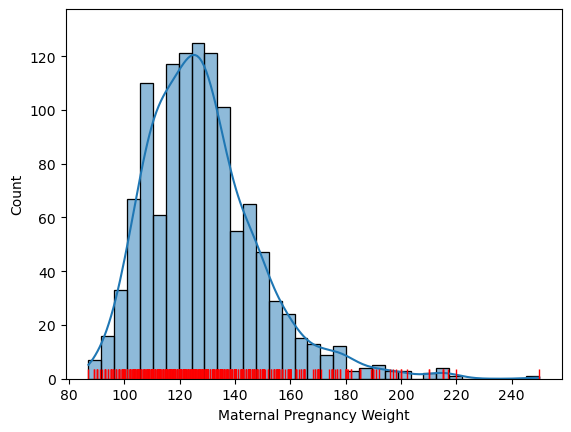

In [15]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', kde = True);
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = 'red');

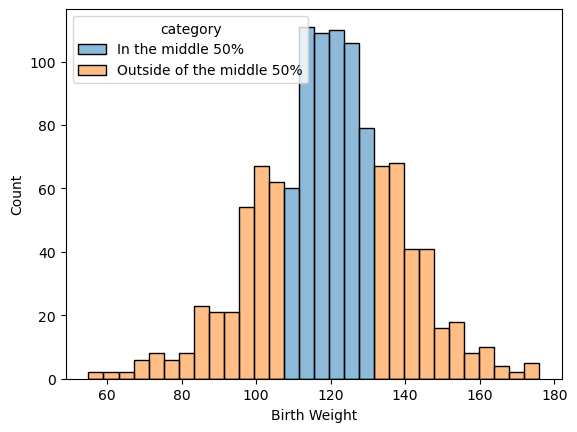

In [16]:
q1, median, q3 = np.percentile(births['Birth Weight'], [25, 50, 75])
iqr = q3 - q1

births['category'] = None
births.loc[(births['Birth Weight'] < q1) | (births['Birth Weight'] > q3), 'category'] = 'Outside of the middle 50%'
births.loc[(births['Birth Weight'] > q1) & (births['Birth Weight'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(births, x = 'Birth Weight', hue = 'category', bins = 30);

births.drop(columns = ['category'], inplace = True)

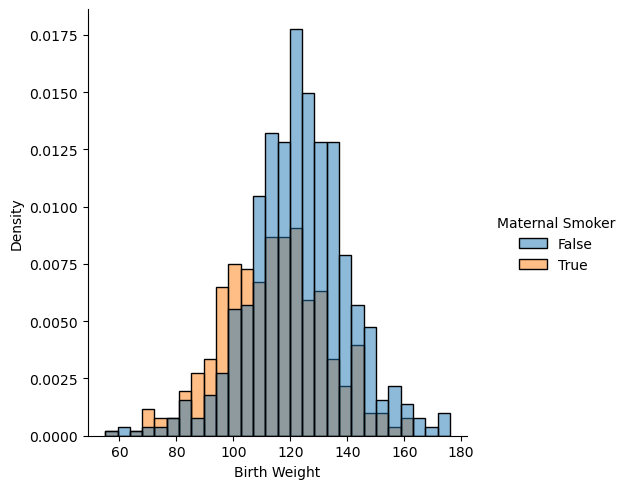

In [17]:
sns.displot(data = births, x = 'Birth Weight', stat = 'density', hue = 'Maternal Smoker');

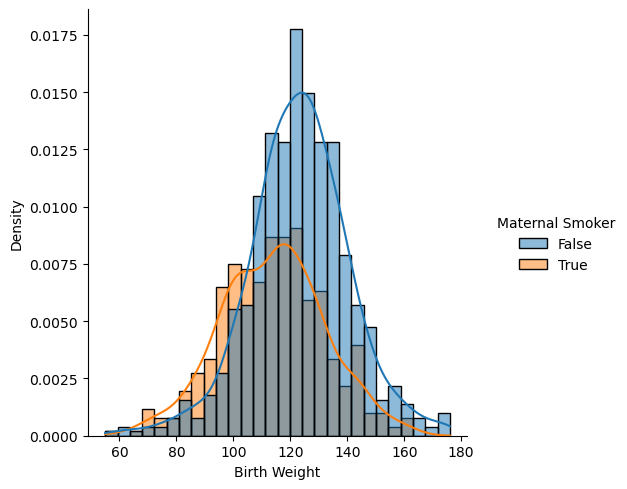

In [18]:
sns.displot(data = births, x = 'Birth Weight', kde = True, stat = 'density', hue = 'Maternal Smoker');

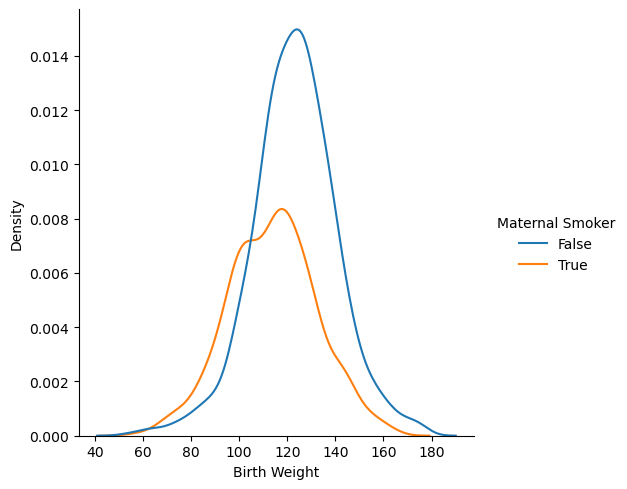

In [19]:
sns.displot(data = births, x = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');

## Box Plots

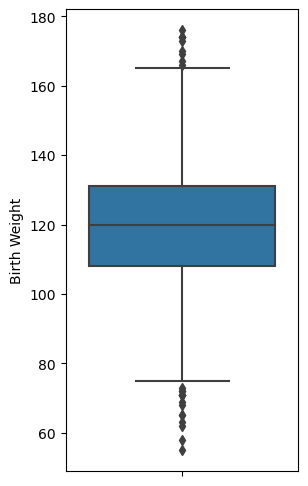

In [20]:
plt.figure(figsize = (3, 6))
sns.boxplot(data = births, y = 'Birth Weight');

In [21]:
bweights = births['Birth Weight']
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

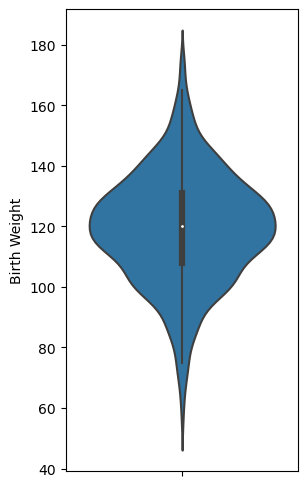

In [22]:
plt.figure(figsize = (3, 6))
sns.violinplot(y = births['Birth Weight']);

## Side by side box plots and violin plots

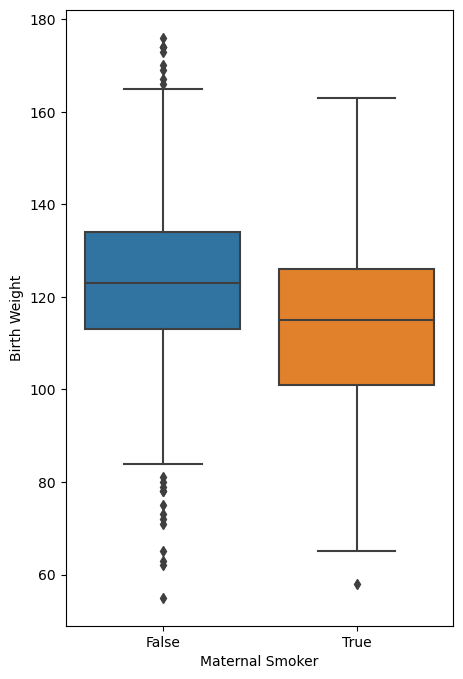

In [23]:
plt.figure(figsize=(5, 8))
sns.boxplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

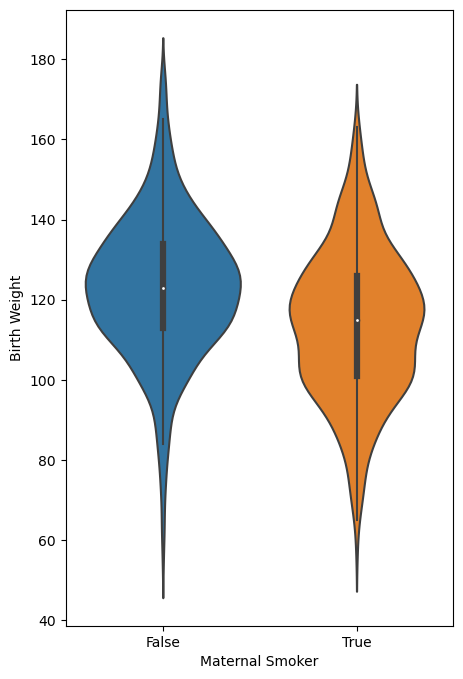

In [24]:
plt.figure(figsize=(5, 8))
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

## Scatter plots

In [25]:
births.head()

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           120               284            27               62   
1           113               282            33               64   
2           128               279            28               64   
3           108               282            23               67   
4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False

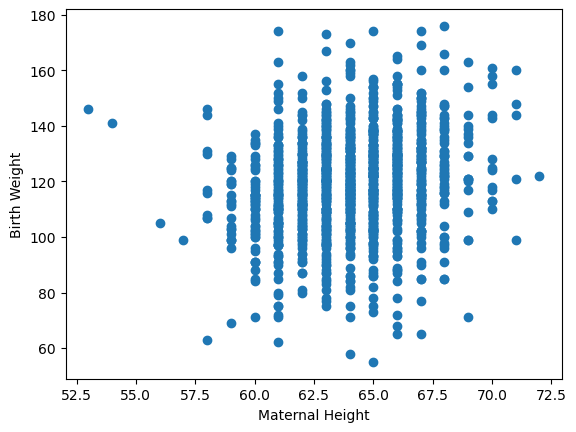

In [26]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

Most `matplotlib` functions also accept a `data=` keyword, and when using this mode, you can then refer to x and y as names of columns in the `data` DataFrame, instead of passing the series explicitly:

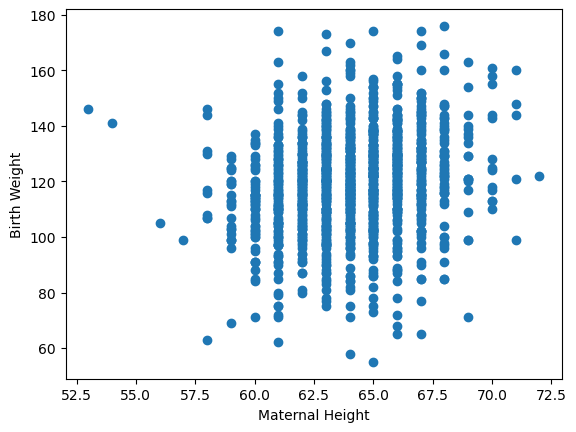

In [27]:
plt.scatter(data = births, x = 'Maternal Height', y = 'Birth Weight');
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

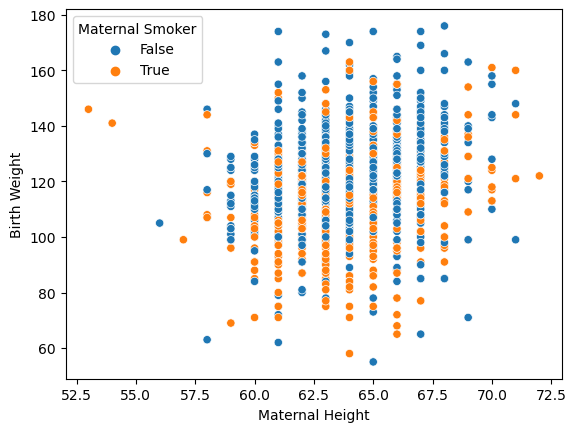

In [28]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

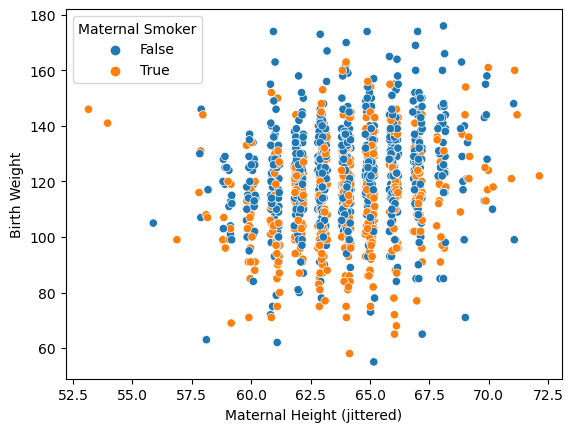

In [29]:
births['Maternal Height (jittered)'] = births['Maternal Height'] + np.random.uniform(-0.2, 0.2, len(births))
fig = sns.scatterplot(data = births, x = 'Maternal Height (jittered)', y = 'Birth Weight', hue = 'Maternal Smoker');

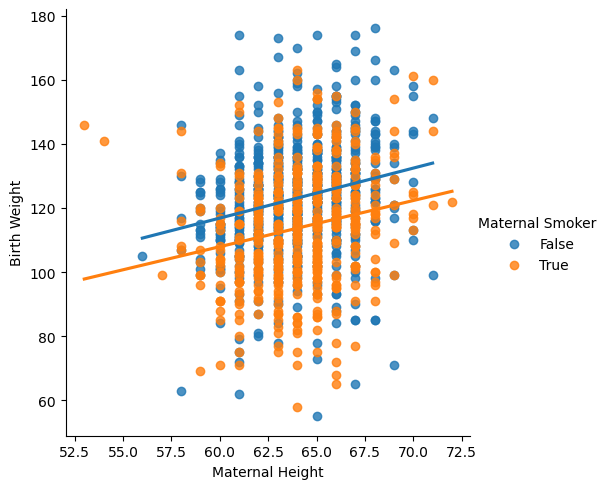

In [30]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', 
           ci = False, hue = 'Maternal Smoker');

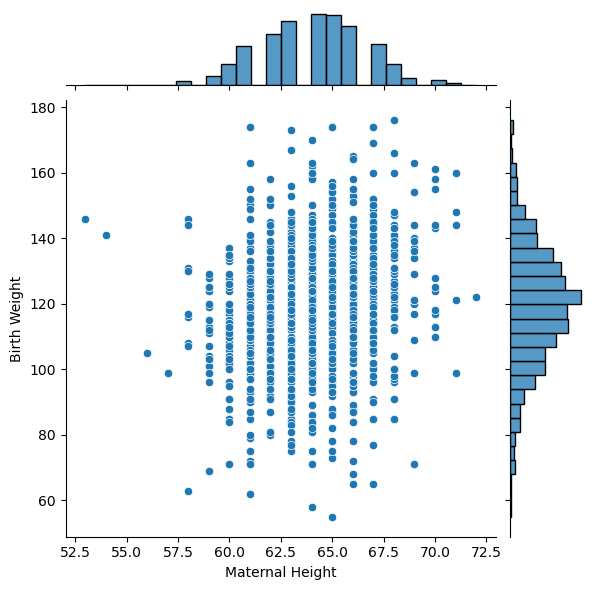

In [31]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

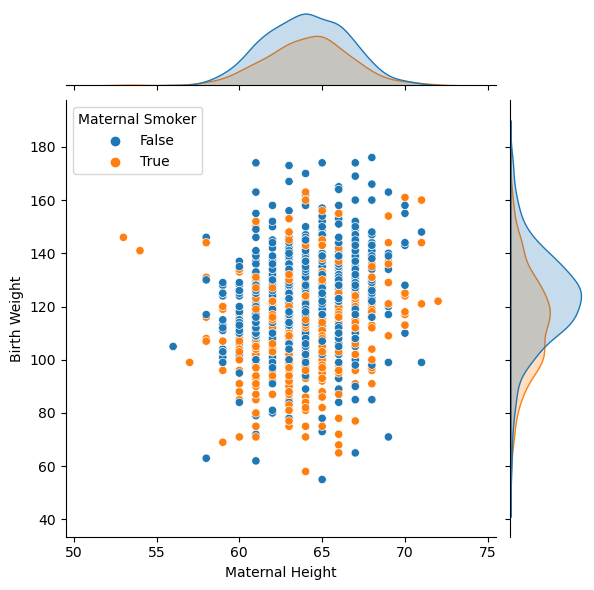

In [32]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

## Hex plots and contour plots

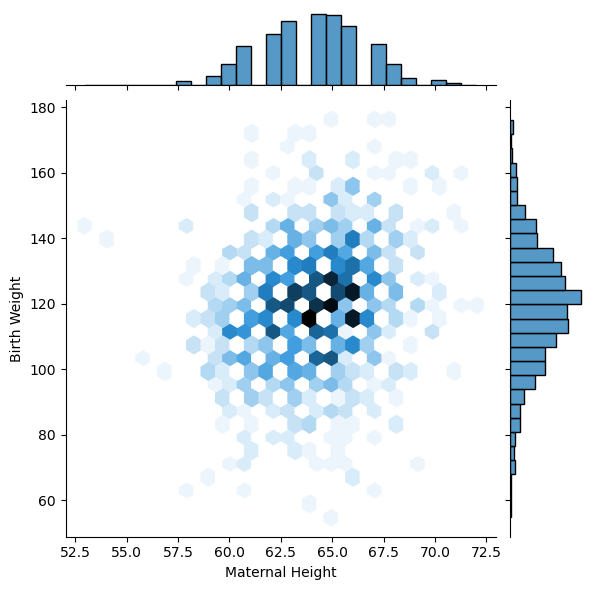

In [33]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'hex');

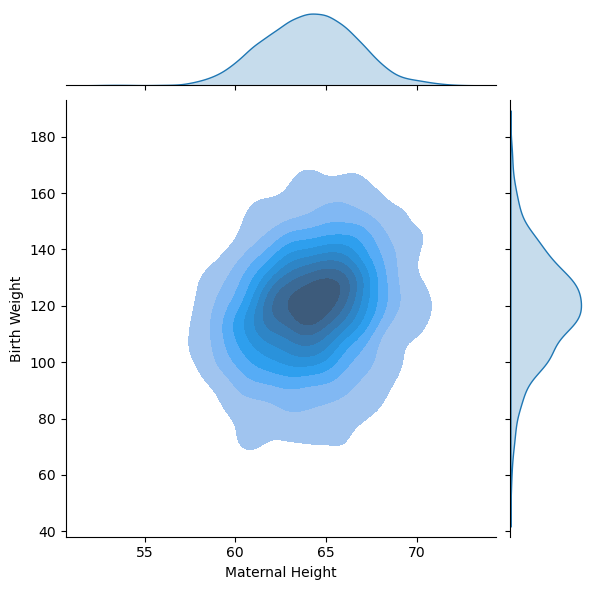

In [34]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', fill = True);

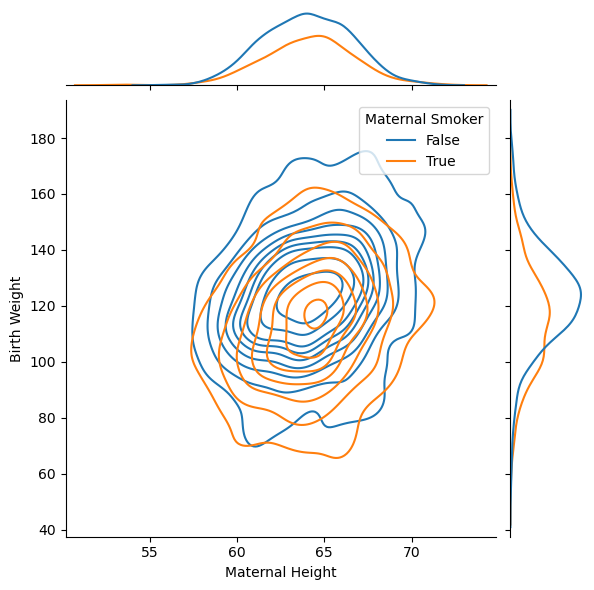

In [35]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');